# T1 - Interesse em aulas particulares de Cálculo

## 0.1 - Importando bibliotecas


In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 - Definindo listas de separação de colunas

In [281]:
colunas_variaveis_qualitativas = [
    "sexo",
    "estado_civil",
    "regiao",
    "profissao",
    "grau_de_dificuldade",
    "curso",
    "serie",
    "dp",
    "fator_de_decisao_na_compra",
    "relevancia_nivel_de_profissionalizacao",
    "relevancia_qualidade_dos_textos",
    "relevancia_qualidade_dos_exercicios",
    "relevancia_preco_hora",
    "relevancia_aprovacao",
    "relevancia_localizacao",
    "gostou_do_produto",
    "divulgaria_produto",
    "compraria_produto",
    "vale_a_pena_50",
    "compraria_produto_final",
    "dificuldade_compreensao",
    "dificuldade_resolver_problemas",
    "dificuldade_equacoes_graficos",
    "dificuldade_aplicar_conceitos",
    "dificuldade_notacoes",
    "interesse_politica",
    "interesse_lazer",
    "interesse_esportes",
    "interesse_economia",
    "interesse_automoveis",
    "interesse_tecnologia",
    "interesse_outros"
]

colunas_variaveis_discretas = [
    "idade",
    "tempo_ideal"
]

colunas_variaveis_continuas = [
    "renda",
    "valor_justo"
]

## 0.3 - Definindo funções

In [309]:
def plotaHist(data,x,titulo,xlabel,ylabel):
    ax = sns.histplot(data=data,x=x,shrink=0.9,multiple='stack')
    ax.set_title(titulo, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(labelsize=15)
    ax.grid(False)
    return ax

def tableOfFrequency(series,tradutor=False):
    dados = pd.DataFrame(series.value_counts())

    if tradutor:
        dados[''] = dados.index.to_series().map(tradutor)
        dados.set_index('',inplace=True)
    
    total = dados['count'].sum()
    dados.loc['total'] = total
    dados['%'] = round((dados['count']/total)*100,2)
    
    return dados

## 1 - Importando o arquivo

In [283]:
LOCAL = "data.csv"
df = pd.read_csv(LOCAL)

pd.set_option('display.max_columns', None)

In [284]:
df.head()

,Carimbo de data/hora,Qual a sua idade?,Qual seu sexo?,Qual o seu estado civil?,Onde você mora?,Qual a sua profissão?,Qual a sua renda pessoal mensal aproximada em reais?,Quais são as principais dificuldades que você enfrenta ao estudar cálculo?,"De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:",Qual o seu curso?,Em qual ano do seu curso você está?,Você tem DP de Cálculo?,Qual assunto desperta a sua atenção?,"Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?",Nível de profissionalização do professor,Qualidade dos textos base (livros usados),Qualidade dos exercícios,Preço hora/aula,Localização (Online ou Presencial),Estatística de pessoas que já passaram de ano por conta dessas aulas,Você gostou do nosso produto?,Você divulgaria o nosso produto aos seus amigos e/ou familiares?,Você compraria o nosso produto?,Quanto tempo você considera ideal para uma aula particular? (em horas),"Se o valor do produto for de R$50,00/hora de aula, você diria que:",Quanto você considera que seria um valor justo a pagar pelo nosso produto (apenas o número)?,"Pelos custos de produção e comercialização calculados, teremos que comercializar esse produto por R$60,00. Por esse valor, você o compraria?"
0,2023/04/04 2:54:34 PM GMT-3,20,Masculino,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.0,Sim
1,2023/04/04 2:54:35 PM GMT-3,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.0,Não
2,2023/04/04 3:02:37 PM GMT-3,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.0,Sim
3,2023/04/04 3:02:44 PM GMT-3,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.0,Sim
4,2023/04/04 3:03:43 PM GMT-3,17,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.0,Sim


In [285]:
# Tirando colunas não relevantes

colunas_nao_relevantes = [
    "Carimbo de data/hora",

]

df.drop(columns=colunas_nao_relevantes, inplace=True)
  
df.head()

,Qual a sua idade?,Qual seu sexo?,Qual o seu estado civil?,Onde você mora?,Qual a sua profissão?,Qual a sua renda pessoal mensal aproximada em reais?,Quais são as principais dificuldades que você enfrenta ao estudar cálculo?,"De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:",Qual o seu curso?,Em qual ano do seu curso você está?,Você tem DP de Cálculo?,Qual assunto desperta a sua atenção?,"Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?",Nível de profissionalização do professor,Qualidade dos textos base (livros usados),Qualidade dos exercícios,Preço hora/aula,Localização (Online ou Presencial),Estatística de pessoas que já passaram de ano por conta dessas aulas,Você gostou do nosso produto?,Você divulgaria o nosso produto aos seus amigos e/ou familiares?,Você compraria o nosso produto?,Quanto tempo você considera ideal para uma aula particular? (em horas),"Se o valor do produto for de R$50,00/hora de aula, você diria que:",Quanto você considera que seria um valor justo a pagar pelo nosso produto (apenas o número)?,"Pelos custos de produção e comercialização calculados, teremos que comercializar esse produto por R$60,00. Por esse valor, você o compraria?"
0,20,Masculino,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.0,Sim
1,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.0,Não
2,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.0,Sim
3,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.0,Sim
4,17,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.0,Sim


In [286]:
colunas_antigas = list(df.columns)
colunas_antigas

['Qual a sua idade?',
 'Qual seu sexo?',
 'Qual o seu estado civil?',
 'Onde você mora?',
 'Qual a sua profissão?',
 'Qual a sua renda pessoal mensal aproximada em reais?',
 'Quais são as principais dificuldades que você enfrenta ao estudar cálculo?',
 'De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:',
 'Qual o seu curso?',
 'Em qual ano do seu curso você está?',
 'Você tem DP de Cálculo?',
 'Qual assunto desperta a sua atenção?',
 'Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?',
 'Nível de profissionalização do professor',
 'Qualidade dos textos base (livros usados)',
 'Qualidade dos exercícios',
 'Preço hora/aula',
 'Localização (Online ou Presencial)',
 'Estatística de pessoas que já passaram de ano por conta dessas aulas',
 'Você gostou do nosso produto?',
 'Você divulgaria o nosso produto aos seus amigos e/ou familiares?',
 'Você compraria o nosso produto?',
 'Quanto tempo você considera ideal para uma aula particular? (e

In [287]:
# Trocando nome das colunas
troca_de_colunas = {
 'Qual a sua idade?': "idade",
 'Qual seu sexo?': "sexo",
 'Qual o seu estado civil?': "estado_civil",
 'Onde você mora?': "regiao",
 'Qual a sua profissão?': "profissao",
 'Qual a sua renda pessoal mensal aproximada em reais?': "renda",
 'Quais são as principais dificuldades que você enfrenta ao estudar cálculo?': "dificuldades_em_estudar_calculo",
 'De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:': "grau_de_dificuldade",
 'Qual o seu curso?': "curso",
 'Em qual ano do seu curso você está?': "serie",
 'Você tem DP de Cálculo?': "dp",
 'Qual assunto desperta a sua atenção?': "assunto_de_interesse",
 'Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?': "fator_de_decisao_na_compra",
 'Nível de profissionalização do professor': "relevancia_nivel_de_profissionalizacao",
 'Qualidade dos textos base (livros usados)': "relevancia_qualidade_dos_textos",
 'Qualidade dos exercícios': "relevancia_qualidade_dos_exercicios",
 'Preço hora/aula': "relevancia_preco_hora",
 'Localização (Online ou Presencial)': "relevancia_localizacao",
 'Estatística de pessoas que já passaram de ano por conta dessas aulas': "relevancia_aprovacao",
 'Você gostou do nosso produto?': "gostou_do_produto",
 'Você divulgaria o nosso produto aos seus amigos e/ou familiares?': "divulgaria_produto",
 'Você compraria o nosso produto?': "compraria_produto",
 'Quanto tempo você considera ideal para uma aula particular? (em horas)': "tempo_ideal",
 'Se o valor do produto for de R$50,00/hora de aula, você diria que:': "vale_a_pena_50",
 'Quanto você considera que seria um valor justo a pagar pelo nosso produto (apenas o número)?': "valor_justo",
 'Pelos custos de produção e comercialização calculados, teremos que comercializar esse produto por R$60,00. Por esse valor, você o compraria?': "compraria_produto_final"
}

df.columns = list(troca_de_colunas.values())
df.head(5)

,idade,sexo,estado_civil,regiao,profissao,renda,dificuldades_em_estudar_calculo,grau_de_dificuldade,curso,serie,dp,assunto_de_interesse,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final
0,20,Masculino,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.0,Sim
1,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.0,Não
2,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.0,Sim
3,18,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.0,Sim
4,17,Masculino,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.0,Sim


Agora será feito o tratamento dos dados. Algumas colunas terão os valores substituidos, para facilitar a manipulação dos dados.

A seguir, estão os dicionários referente às trocas de valores feitas

In [288]:
trocando_sexo = {
    "Masculino":0,
    "Feminino":1
}

contrario_trocando_sexo = dict(zip(trocando_sexo.values(), trocando_sexo.keys()))

dificuldades_em_estudar_calculo_opcoes = {
    "Compreensão geral dos conceitos matemáticos": "dificuldade_compreensao",
    "Habilidade em resolver problemas matemáticos": "dificuldade_resolver_problemas",
    "Habilidade em trabalhar com equações e gráficos matemáticos": "dificuldade_equacoes_graficos",
    "Habilidade em aplicar conceitos matemáticos para situações práticas": "dificuldade_aplicar_conceitos",
    "Dificuldade em entender ou aplicar notações matemáticas": "dificuldade_notacoes"
}

contrario_dificuldades_em_estudar_calculo_opcoes = dict(zip(dificuldades_em_estudar_calculo_opcoes.values(), dificuldades_em_estudar_calculo_opcoes.keys()))

assunto_de_interesse_opcoes = {
    "Política": "interesse_politica",
    "Lazer": "interesse_lazer",
    "Esportes": "interesse_esportes",
    "Economia": "interesse_economia",
    "Automóveis": "interesse_automoveis",
    "Tecnologia": "interesse_tecnologia",
    "Outros": "interesse_outros",
}

contrario_assunto_de_interesse_opcoes = dict(zip(assunto_de_interesse_opcoes.values(), assunto_de_interesse_opcoes.keys()))

vale_pena_50_opcoes = {
    "um bom valor e eu provavelmente compraria": 0,
    "é tão barato que é evidente que a qualidade não deve ser tão boa": 1,
    "um pouco caro e eu teria que pensar melhor para decidir se compraria": 2,
    "muito caro e nem considero comprar": 3
}

contrario_vale_pena_50_opcoes = dict(zip(vale_pena_50_opcoes.values(), vale_pena_50_opcoes.keys()))

fator_de_decisao_na_compra_opcoes = {
    "Preço Hora/Aula": "relevancia_preco_hora",
    "Localização (Online ou presencial)": "relevancia_localizacao",
    "Nível de profissionalização do professor": "relevancia_nivel_de_profissionalizacao",
    "Exercícios": "relevancia_qualidade_dos_exercicios",
    "Estatística de pessoas que já passaram de ano por conta dessas aulas": "relevancia_aprovacao",
    "Textos bases (Livros utilizados)": "relevancia_qualidade_dos_textos"
}

contrario_fator_de_decisao_na_compra_opcoes = dict(zip(fator_de_decisao_na_compra_opcoes.values(), fator_de_decisao_na_compra_opcoes.keys()))

In [289]:

# Trocando valores de "sexo"

df.sexo = df.sexo.map(trocando_sexo)


df.head()

,idade,sexo,estado_civil,regiao,profissao,renda,dificuldades_em_estudar_calculo,grau_de_dificuldade,curso,serie,dp,assunto_de_interesse,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final
0,20,0,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.0,Sim
1,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.0,Não
2,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.0,Sim
3,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.0,Sim
4,17,0,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.0,Sim


In [290]:
# dificuldades em estudar calculo

for dificuldade in dificuldades_em_estudar_calculo_opcoes.values():
  df[dificuldade] = False

df.head()  

,idade,sexo,estado_civil,regiao,profissao,renda,dificuldades_em_estudar_calculo,grau_de_dificuldade,curso,serie,dp,assunto_de_interesse,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final,dificuldade_compreensao,dificuldade_resolver_problemas,dificuldade_equacoes_graficos,dificuldade_aplicar_conceitos,dificuldade_notacoes
0,20,0,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.0,Sim,False,False,False,False,False
1,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.0,Não,False,False,False,False,False
2,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.0,Sim,False,False,False,False,False
3,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.0,Sim,False,False,False,False,False
4,17,0,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.0,Sim,False,False,False,False,False


In [291]:
# Adicionando valores nas colunas adicionadas

for idx, value in enumerate(df.dificuldades_em_estudar_calculo):
  elementos = value.split(';')
  for elemento in elementos:
    df.loc[idx, dificuldades_em_estudar_calculo_opcoes[elemento]] = True

df

,idade,sexo,estado_civil,regiao,profissao,renda,dificuldades_em_estudar_calculo,grau_de_dificuldade,curso,serie,dp,assunto_de_interesse,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final,dificuldade_compreensao,dificuldade_resolver_problemas,dificuldade_equacoes_graficos,dificuldade_aplicar_conceitos,dificuldade_notacoes
0,20,0,Solteiro(a),Capital de SP,Estudante com Renda,1.000000e+03,Habilidade em resolver problemas matemáticos;H...,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.00,Sim,False,True,True,False,True
1,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,1.700000e+04,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.00,Não,False,False,False,True,False
2,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.000000e+00,Compreensão geral dos conceitos matemáticos;Ha...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.00,Sim,True,True,False,False,False
3,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.000000e+00,Habilidade em trabalhar com equações e gráfico...,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.00,Sim,False,False,True,True,True
4,17,0,Solteiro(a),Capital de SP,Estudante sem Renda,5.000000e+02,Compreensão geral dos conceitos matemáticos,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.00,Sim,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,100,0,Viúvo(a),Região do ABCD,Estudante sem Renda,1.000000e+57,Habilidade em aplicar conceitos matemáticos pa...,1,Engenharia de Computação,4º ano,Não,Lazer;Tecnologia,Exercícios,Não relevante,Relevante,Relevante,Relevante,Online,Relevante,Não,Sim,Não,3.0,muito caro e nem considero comprar,60.00,Não,False,False,False,True,False
81,21,0,Solteiro(a),Região do ABCD,Desempregado,2.400000e+01,Habilidade em trabalhar com equações e gráfico...,1,Engenharia de Computação,4º ano,Não,Lazer;Economia;Tecnologia,Preço Hora/Aula,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Não,Sim,Não,1.3,um bom valor e eu provavelmente compraria,0.98,Sim,False,False,True,False,False
82,19,0,Solteiro(a),Capital de SP,Estudante com Renda,3.000000e+03,Habilidade em aplicar conceitos matemáticos pa...,2,Ciências da Computação,1º ano,Não,Política;Lazer;Esportes;Economia;Automóveis;Te...,Estatística de pessoas que já passaram de ano ...,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Sim,Sim,Não,2.0,um pouco caro e eu teria que pensar melhor par...,30.00,Sim,False,False,False,True,False
83,18,1,Solteiro(a),Capital de SP,Estudante sem Renda,1.000000e+02,Compreensão geral dos conceitos matemáticos;Ha...,5,Administração,1º ano,Não,Política;Economia;Tecnologia;Outros,Estatística de pessoas que já passaram de ano ...,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelme

In [292]:
# Tirando a coluna de todas as dificuldades

df.drop(columns=["dificuldades_em_estudar_calculo"], inplace=True)
df

,idade,sexo,estado_civil,regiao,profissao,renda,grau_de_dificuldade,curso,serie,dp,assunto_de_interesse,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final,dificuldade_compreensao,dificuldade_resolver_problemas,dificuldade_equacoes_graficos,dificuldade_aplicar_conceitos,dificuldade_notacoes
0,20,0,Solteiro(a),Capital de SP,Estudante com Renda,1.000000e+03,3,Engenharia de Computação,1º ano,Não,Lazer;Economia;Automóveis;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Online,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,100.00,Sim,False,True,True,False,True
1,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,1.700000e+04,1,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia;Outros,Localização (Online ou presencial),Não relevante,Relevante,Relevante,Relevante,Presencial,Relevante,Sim,Não,Não,2.0,um bom valor e eu provavelmente compraria,40.00,Não,False,False,False,True,False
2,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.000000e+00,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Tecnologia,Preço Hora/Aula,Não relevante,Não relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,1.5,um bom valor e eu provavelmente compraria,60.00,Sim,True,True,False,False,False
3,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.000000e+00,3,Engenharia (Ciclo Básico),1º ano,Não,Lazer;Automóveis;Tecnologia,Nível de profissionalização do professor,Relevante,Relevante,Relevante,Não relevante,Presencial,Não relevante,Sim,Sim,Sim,1.0,um bom valor e eu provavelmente compraria,60.00,Sim,False,False,True,True,True
4,17,0,Solteiro(a),Capital de SP,Estudante sem Renda,5.000000e+02,3,Engenharia (Ciclo Básico),1º ano,Não,Esportes;Tecnologia,Exercícios,Relevante,Relevante,Relevante,Relevante,Presencial,Não relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,50.00,Sim,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,100,0,Viúvo(a),Região do ABCD,Estudante sem Renda,1.000000e+57,1,Engenharia de Computação,4º ano,Não,Lazer;Tecnologia,Exercícios,Não relevante,Relevante,Relevante,Relevante,Online,Relevante,Não,Sim,Não,3.0,muito caro e nem considero comprar,60.00,Não,False,False,False,True,False
81,21,0,Solteiro(a),Região do ABCD,Desempregado,2.400000e+01,1,Engenharia de Computação,4º ano,Não,Lazer;Economia;Tecnologia,Preço Hora/Aula,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Não,Sim,Não,1.3,um bom valor e eu provavelmente compraria,0.98,Sim,False,False,True,False,False
82,19,0,Solteiro(a),Capital de SP,Estudante com Renda,3.000000e+03,2,Ciências da Computação,1º ano,Não,Política;Lazer;Esportes;Economia;Automóveis;Te...,Estatística de pessoas que já passaram de ano ...,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Sim,Sim,Não,2.0,um pouco caro e eu teria que pensar melhor par...,30.00,Sim,False,False,False,True,False
83,18,1,Solteiro(a),Capital de SP,Estudante sem Renda,1.000000e+02,5,Administração,1º ano,Não,Política;Economia;Tecnologia;Outros,Estatística de pessoas que já passaram de ano ...,Relevante,Não relevante,Relevante,Relevante,Presencial,Relevante,Sim,Sim,Sim,2.0,um bom valor e eu provavelmente compraria,80.00,Sim,True,True,True,False,True


In [293]:
# assunto_de_interesse

for interesse in assunto_de_interesse_opcoes.values():
  df[interesse] = False

for idx, value in enumerate(df.assunto_de_interesse):
  elementos = value.split(';')
  for elemento in elementos:
    df.loc[idx, assunto_de_interesse_opcoes[elemento]] = True

df.drop(columns=["assunto_de_interesse"], inplace=True)

In [294]:
# Trocando relevância para booleano

df.relevancia_nivel_de_profissionalizacao = df.relevancia_nivel_de_profissionalizacao.map({"Não relevante":False, "Relevante":True})
df.relevancia_qualidade_dos_textos = df.relevancia_qualidade_dos_textos.map({"Não relevante":False, "Relevante":True})
df.relevancia_qualidade_dos_exercicios = df.relevancia_qualidade_dos_exercicios.map({"Não relevante":False, "Relevante":True})
df.relevancia_preco_hora = df.relevancia_preco_hora.map({"Não relevante":False, "Relevante":True})
df.relevancia_aprovacao = df.relevancia_aprovacao.map({"Não relevante":False, "Relevante":True})


In [295]:
# Trocando Sim/Não para valores booleanos

df.dp = df.dp.map({"Não":False, "Sim":True})
df.gostou_do_produto = df.gostou_do_produto.map({"Não":False, "Sim":True})
df.divulgaria_produto = df.divulgaria_produto.map({"Não":False, "Sim":True})
df.compraria_produto = df.compraria_produto.map({"Não":False, "Sim":True})
df.compraria_produto_final = df.compraria_produto_final.map({"Não":False, "Sim":True})

In [296]:
le_a_pena_50 = df.vale_a_pena_50.map(vale_pena_50_opcoes)

In [297]:
# Trocando valores de "regiao"

df.fator_de_decisao_na_compra = df.fator_de_decisao_na_compra.map(fator_de_decisao_na_compra_opcoes)


In [298]:
df.head()

,idade,sexo,estado_civil,regiao,profissao,renda,grau_de_dificuldade,curso,serie,dp,fator_de_decisao_na_compra,relevancia_nivel_de_profissionalizacao,relevancia_qualidade_dos_textos,relevancia_qualidade_dos_exercicios,relevancia_preco_hora,relevancia_localizacao,relevancia_aprovacao,gostou_do_produto,divulgaria_produto,compraria_produto,tempo_ideal,vale_a_pena_50,valor_justo,compraria_produto_final,dificuldade_compreensao,dificuldade_resolver_problemas,dificuldade_equacoes_graficos,dificuldade_aplicar_conceitos,dificuldade_notacoes,interesse_politica,interesse_lazer,interesse_esportes,interesse_economia,interesse_automoveis,interesse_tecnologia,interesse_outros
0,20,0,Solteiro(a),Capital de SP,Estudante com Renda,1000.0,3,Engenharia de Computação,1º ano,False,relevancia_preco_hora,False,False,True,True,Online,False,True,True,True,1.0,um bom valor e eu provavelmente compraria,100.0,True,False,True,True,False,True,False,True,False,True,True,True,False
1,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,17000.0,1,Engenharia (Ciclo Básico),1º ano,False,relevancia_localizacao,False,True,True,True,Presencial,True,True,False,False,2.0,um bom valor e eu provavelmente compraria,40.0,False,False,False,False,True,False,False,True,False,False,False,True,True
2,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,3,Engenharia (Ciclo Básico),1º ano,False,relevancia_preco_hora,False,False,True,True,Presencial,False,True,True,True,1.5,um bom valor e eu provavelmente compraria,60.0,True,True,True,False,False,False,False,True,False,False,False,True,False
3,18,0,Solteiro(a),Capital de SP,Estudante sem Renda,0.0,3,Engenharia (Ciclo Básico),1º ano,False,relevancia_nivel_de_profissionalizacao,True,True,True,False,Presencial,False,True,True,True,1.0,um bom valor e eu provavelmente compraria,60.0,True,False,False,True,True,True,False,True,False,False,True,True,False
4,17,0,Solteiro(a),Capital de SP,Estudante sem Renda,500.0,3,Engenharia (Ciclo Básico),1º ano,False,relevancia_qualidade_dos_exercicios,True,True,True,True,Presencial,False,True,True,True,2.0,um bom valor e eu provavelmente compraria,50.0,True,True,False,False,False,False,False,False,True,False,False,True,False


Variáveis qualitativas:
- sexo
- estado_civil
- regiao
- profissao
- grau_de_dificuldade
- curso
- serie
- dp
- fator_de_decisao_na_compra
- relevancia
  - relevancia_nivel_de_profissionalizacao
  - relevancia_qualidade_dos_textos
  - relevancia_qualidade_dos_exercicios
  - relevancia_preco_hora
  - relevancia_aprovacao	
  - **relevancia_localizacao**
- gostou_do_produto	
- divulgaria_produto	
- compraria_produto
- vale_a_pena_50
- compraria_produto_final
- dificuldade
  - dificuldade_compreensao
  - dificuldade_resolver_problemas
  - dificuldade_equacoes_graficos
  - dificuldade_aplicar_conceitos
  - dificuldade_notacoes
- interesse
  - interesse_politica
  - interesse_lazer
  - interesse_esportes
  - interesse_economia
  - interesse_automoveis
  - interesse_tecnologia
  - interesse_outros


Variáveis quantitativas
1. Descritiva
- idade
- tempo_ideal

2. Contínua
- renda
- valor_justo

In [299]:
df = df[df.idade <= 30]

In [310]:
for i in colunas_variaveis_qualitativas:
    display(tableOfFrequency(df[i]))


,count,%
sexo,,
0,65,77.38
1,19,22.62
total,84,100.00


,count,%
estado_civil,,
Solteiro(a),83,98.81
Casado(a),1,1.19
total,84,100.00


,count,%
regiao,,
Capital de SP,53,63.10
Região do ABCD,26,30.95
Interior de SP,4,4.76
Litoral de SP,1,1.19
total,84,100.00


,count,%
profissao,,
Estudante sem Renda,64,76.19
Estudante com Renda,16,19.05
Desempregado,3,3.57
Trabalhando,1,1.19
total,84,100.00


,count,%
grau_de_dificuldade,,
3,45,53.57
4,14,16.67
2,11,13.10
5,10,11.90
1,4,4.76
total,84,100.00


,count,%
curso,,
Engenharia (Ciclo Básico),60,71.43
Engenharia de Computação,8,9.52
Ciências da Computação,4,4.76
Engenharia Mecânica,3,3.57
Engenharia de Produção,2,2.38
Engenharia Química,2,2.38
Engenharia de Alimentos,2,2.38
Engenharia Civil,1,1.19
Engenharia de Controle e Automação,1,1.19


,count,%
serie,,
1º ano,71,84.52
2º ano,6,7.14
4º ano,5,5.95
3º ano,2,2.38
total,84,100.00


,count,%
dp,,
False,82,97.62
True,2,2.38
total,84,100.00


,count,%
fator_de_decisao_na_compra,,
relevancia_qualidade_dos_exercicios,23,27.38
relevancia_aprovacao,21,25.00
relevancia_nivel_de_profissionalizacao,19,22.62
relevancia_preco_hora,16,19.05
relevancia_localizacao,5,5.95
total,84,100.00


,count,%
relevancia_nivel_de_profissionalizacao,,
True,58,69.05
False,26,30.95
total,84,100.00


,count,%
relevancia_qualidade_dos_textos,,
True,55,65.48
False,29,34.52
total,84,100.00


,count,%
relevancia_qualidade_dos_exercicios,,
True,83,98.81
False,1,1.19
total,84,100.00


,count,%
relevancia_preco_hora,,
True,73,86.9
False,11,13.1
total,84,100.0


,count,%
relevancia_aprovacao,,
True,61,72.62
False,23,27.38
total,84,100.00


,count,%
relevancia_localizacao,,
Presencial,55,65.48
Online,29,34.52
total,84,100.00


,count,%
gostou_do_produto,,
True,80,95.24
False,4,4.76
total,84,100.00


,count,%
divulgaria_produto,,
True,76,90.48
False,8,9.52
total,84,100.00


,count,%
compraria_produto,,
True,62,73.81
False,22,26.19
total,84,100.00


,count,%
vale_a_pena_50,,
um bom valor e eu provavelmente compraria,61,72.62
um pouco caro e eu teria que pensar melhor para decidir se compraria,16,19.05
é tão barato que é evidente que a qualidade não deve ser tão boa,5,5.95
muito caro e nem considero comprar,2,2.38
total,84,100.00


,count,%
compraria_produto_final,,
True,59,70.24
False,25,29.76
total,84,100.00


,count,%
dificuldade_compreensao,,
False,57,67.86
True,27,32.14
total,84,100.00


,count,%
dificuldade_resolver_problemas,,
False,48,57.14
True,36,42.86
total,84,100.00


,count,%
dificuldade_equacoes_graficos,,
True,43,51.19
False,41,48.81
total,84,100.00


,count,%
dificuldade_aplicar_conceitos,,
False,51,60.71
True,33,39.29
total,84,100.00


,count,%
dificuldade_notacoes,,
False,50,59.52
True,34,40.48
total,84,100.00


,count,%
interesse_politica,,
False,65,77.38
True,19,22.62
total,84,100.00


,count,%
interesse_lazer,,
True,44,52.38
False,40,47.62
total,84,100.00


,count,%
interesse_esportes,,
True,48,57.14
False,36,42.86
total,84,100.00


,count,%
interesse_economia,,
False,58,69.05
True,26,30.95
total,84,100.00


,count,%
interesse_automoveis,,
False,52,61.9
True,32,38.1
total,84,100.0


,count,%
interesse_tecnologia,,
True,60,71.43
False,24,28.57
total,84,100.00


,count,%
interesse_outros,,
False,66,78.57
True,18,21.43
total,84,100.00


<Axes: title={'center': 'Histograma de idade'}, xlabel='idade'>

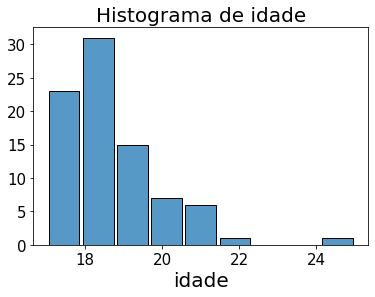

In [306]:
plotaHist(df,'idade','Histograma de idade','idade', '')

<Axes: xlabel='renda'>

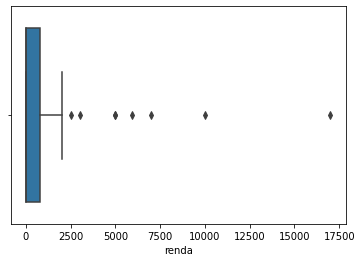

In [302]:
# analisando a renda
sns.boxplot(data=df, x='renda')

In [303]:
variaveis_quantitativas = colunas_variaveis_discretas + colunas_variaveis_continuas

analise_quantitativa = df[variaveis_quantitativas].agg(['mean', 'median', 'std', 'var'])

analise_quantitativa = analise_quantitativa.round(2)

analise_quantitativa.loc['mode'] = df[variaveis_quantitativas].mode().iloc[0]

analise_quantitativa.loc['cv'] = df[variaveis_quantitativas].std()/df[variaveis_quantitativas].mean() * 100

analise_quantitativa.rename(index={'mean':'média', 'median':'mediana', 'std':'desvio padrão', 'var':'variância', 'mode': "moda", 'cv': 'cv%'}, inplace=True)

analise_quantitativa


,idade,tempo_ideal,renda,valor_justo
média,18.420000,1.830000,9.230800e+02,54.630000
mediana,18.000000,2.000000,0.000000e+00,50.000000
desvio padrão,1.430000,0.660000,2.448790e+03,23.810000
variância,2.050000,0.430000,5.996556e+06,566.910000
moda,18.000000,2.000000,0.000000e+00,50.000000
cv%,7.780472,35.889303,2.652834e+02,43.583388
